<a href="https://colab.research.google.com/github/AngelTroncoso/clasificacion/blob/main/clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/2160-aprendiendo-a-clasificar-datos-con-ml/refs/heads/desafio/churn.csv"
datos = pd.read_csv(url)

In [5]:
datos.head()

id_cliente  score_credito     pais sexo_biologico  edad  años_de_cliente  \
0    15634602            619  Francia          Mujer    42                2   
1    15647311            608   España          Mujer    41                1   
2    15619304            502  Francia          Mujer    42                8   
3    15701354            699  Francia          Mujer    39                1   
4    15737888            850   España          Mujer    43                2   

       saldo  servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0       0.00                     1                      1               1   
1   83807.86                     1                      0               1   
2  159660.80                     3                      1               0   
3       0.00                     2                      0               0   
4  125510.82                     1                      1               1   

   salario_estimado  churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             10000 non-null  int64  
 1   score_credito          10000 non-null  int64  
 2   pais                   10000 non-null  object 
 3   sexo_biologico         10000 non-null  object 
 4   edad                   10000 non-null  int64  
 5   años_de_cliente        10000 non-null  int64  
 6   saldo                  10000 non-null  float64
 7   servicios_adquiridos   10000 non-null  int64  
 8   tiene_tarjeta_credito  10000 non-null  int64  
 9   miembro_activo         10000 non-null  int64  
 10  salario_estimado       10000 non-null  float64
 11  churn                  10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [7]:
import plotly.express as px

In [9]:
px.histogram(datos, x='pais', title='Adherencia a Inversión',text_auto=True)

In [12]:
px.histogram(datos, x='sexo_biologico',text_auto=True,barmode='group' )

In [13]:
px.histogram(datos, x='sexo_biologico',color='pais',text_auto=True,barmode='group' )

### Variables numéricas

In [14]:
px.box(datos, x='id_cliente', color='churn')

In [15]:
px.box(datos, x='score_credito', color='churn')

In [16]:
px.box(datos, x='edad', color='churn')

In [17]:
px.box(datos, x='años_de_cliente', color='churn')

In [18]:
px.box(datos, x='saldo', color='churn')

In [19]:
px.box(datos, x='servicios_adquiridos', color='churn')

In [20]:
px.box(datos, x='tiene_tarjeta_credito', color='churn')

In [21]:
px.box(datos, x='miembro_activo', color='churn')

In [22]:
px.box(datos, x='salario_estimado', color='churn')

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [23]:
datos

id_cliente  score_credito      pais sexo_biologico  edad  \
0       15634602            619   Francia          Mujer    42   
1       15647311            608    España          Mujer    41   
2       15619304            502   Francia          Mujer    42   
3       15701354            699   Francia          Mujer    39   
4       15737888            850    España          Mujer    43   
...          ...            ...       ...            ...   ...   
9995    15606229            771   Francia         Hombre    39   
9996    15569892            516   Francia         Hombre    35   
9997    15584532            709   Francia          Mujer    36   
9998    15682355            772  Alemania         Hombre    42   
9999    15628319            792   Francia          Mujer    28   

      años_de_cliente      saldo  servicios_adquiridos  tiene_tarjeta_credito  \
0                   2       0.00                     1                      1   
1                   1   83807.86                     1                      0   
2                   8  159660.80                     3                      1   
3                   1       0.00                     2                      0   
4                   2  125510.82                     1                      1   
...               ...        ...                   ...                    ...   
9995                5       0.00                     2                      1   
9996               10   57369.61                     1                      1   
9997                7       0.00                     1                      0   
9998                3   75075.31                     2                      1   
9999                4  130142.79                     1                      1   

      miembro_activo  salario_estimado  churn  
0                  1         101348.88      1  
1                  1         112542.58      0  
2                  0         113931.57      1  
3                  0          93826.63      0  
4                  1          79084.10      0  
...              ...               ...    ...  
9995               0          96270.64      0  
9996               1         101699.77      0  
9997               1          42085.58      1  
9998               0          92888.52      1  
9999               0          38190.78      0  

[10000 rows x 12 columns]

In [24]:
#variables explicativas por convension estan en X y en Y quedara la variable Explicativa
x = datos.drop('churn', axis=1)
y = datos['churn']

In [25]:
x

id_cliente  score_credito      pais sexo_biologico  edad  \
0       15634602            619   Francia          Mujer    42   
1       15647311            608    España          Mujer    41   
2       15619304            502   Francia          Mujer    42   
3       15701354            699   Francia          Mujer    39   
4       15737888            850    España          Mujer    43   
...          ...            ...       ...            ...   ...   
9995    15606229            771   Francia         Hombre    39   
9996    15569892            516   Francia         Hombre    35   
9997    15584532            709   Francia          Mujer    36   
9998    15682355            772  Alemania         Hombre    42   
9999    15628319            792   Francia          Mujer    28   

      años_de_cliente      saldo  servicios_adquiridos  tiene_tarjeta_credito  \
0                   2       0.00                     1                      1   
1                   1   83807.86                     1                      0   
2                   8  159660.80                     3                      1   
3                   1       0.00                     2                      0   
4                   2  125510.82                     1                      1   
...               ...        ...                   ...                    ...   
9995                5       0.00                     2                      1   
9996               10   57369.61                     1                      1   
9997                7       0.00                     1                      0   
9998                3   75075.31                     2                      1   
9999                4  130142.79                     1                      1   

      miembro_activo  salario_estimado  
0                  1         101348.88  
1                  1         112542.58  
2                  0         113931.57  
3                  0          93826.63  
4                  1          79084.10  
...              ...               ...  
9995               0          96270.64  
9996               1         101699.77  
9997               1          42085.58  
9998               0          92888.52  
9999               0          38190.78  

[10000 rows x 11 columns]

In [26]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

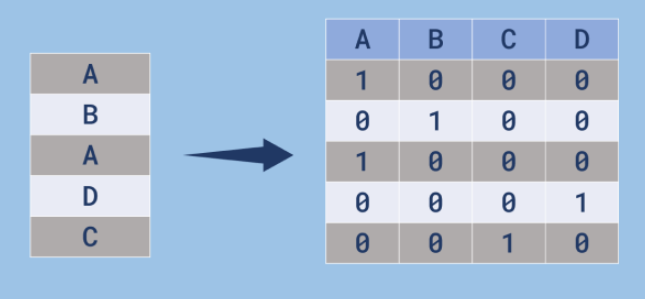

In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [28]:
columnas = x.columns

In [29]:
#remainder='passthrough' = omitir el restante de las columnas
#sparse_threshold=0 = no quite informacion relevnte
#sparse_threshold=0,force_int_remainder_cols=False = no cambiar los nombres de las columnas
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['pais','sexo_biologico']),remainder='passthrough', sparse_threshold=0,force_int_remainder_cols=False)

In [30]:
x = one_hot.fit_transform(x)

In [31]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__sexo_biologico_Mujer', 'remainder__id_cliente',
       'remainder__score_credito', 'remainder__edad',
       'remainder__años_de_cliente', 'remainder__saldo',
       'remainder__servicios_adquiridos',
       'remainder__tiene_tarjeta_credito', 'remainder__miembro_activo',
       'remainder__salario_estimado'], dtype=object)

In [32]:
pd.DataFrame(x,columns=one_hot.get_feature_names_out(columnas))

onehotencoder__pais_Alemania  onehotencoder__pais_España  \
0                              0.0                         0.0   
1                              0.0                         1.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         1.0   
...                            ...                         ...   
9995                           0.0                         0.0   
9996                           0.0                         0.0   
9997                           0.0                         0.0   
9998                           1.0                         0.0   
9999                           0.0                         0.0   

      onehotencoder__pais_Francia  onehotencoder__sexo_biologico_Mujer  \
0                             1.0                                  1.0   
1                             0.0                                  1.0   
2                             1.0                                  1.0   
3                             1.0                                  1.0   
4                             0.0                                  1.0   
...                           ...                                  ...   
9995                          1.0                                  0.0   
9996                          1.0                                  0.0   
9997                          1.0                                  1.0   
9998                          0.0                                  0.0   
9999                          1.0                                  1.0   

      remainder__id_cliente  remainder__score_credito  remainder__edad  \
0                15634602.0                     619.0             42.0   
1                15647311.0                     608.0             41.0   
2                15619304.0                     502.0             42.0   
3                15701354.0                     699.0             39.0   
4                15737888.0                     850.0             43.0   
...                     ...                       ...              ...   
9995             15606229.0                     771.0             39.0   
9996             15569892.0                     516.0             35.0   
9997             15584532.0                     709.0             36.0   
9998             15682355.0                     772.0             42.0   
9999             15628319.0                     792.0             28.0   

      remainder__años_de_cliente  remainder__saldo  \
0                            2.0              0.00   
1                            1.0          83807.86   
2                            8.0         159660.80   
3                            1.0              0.00   
4                            2.0         125510.82   
...                          ...               ...   
9995                         5.0              0.00   
9996                        10.0          57369.61   
9997                         7.0              0.00   
9998                         3.0          75075.31   
9999                         4.0         130142.79   

      remainder__servicios_adquiridos  remainder__tiene_tarjeta_credito  \
0                                 1.0                               1.0   
1                                 1.0                               0.0   
2                                 3.0                               1.0   
3                                 2.0                               0.0   
4                                 1.0                               1.0   
...                               ...                               ...   
9995                              2.0                               1.0   
9996                              1.0                               1.0   
9997                              1.0                               0.0   
9998                              2.

## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()

In [35]:
y = label_encoder.fit_transform(y)

In [36]:
y

array([1, 0, 1, ..., 1, 1, 0])

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [37]:
#modulo de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [38]:
#stratify=y = para que sea la misma proporcion en datos de prueba y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=5)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [39]:
#domiclasificador = clasificador simple o bobo
from sklearn.dummy import DummyClassifier

In [40]:
#le paso toda mi base de entrenamiento
#dumy score veo su rendimiento en este caso es = 0.60 aunque puede aderirse al que tenga un mayor "Frecuencia" por lo que no es fiable
#pero Establecer un rendimiento mínimo que un modelo más avanzado debe superar.

dummy = DummyClassifier()
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.7964

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
#compara y segmenta las columnas entre los datos de mayor y menor valor
#algoritmo de gini, evalua que tn mescladas estan las clases de 0 a 1 1= completamente mesclada 0= segmentada
#random_state=5 estado de aleatoriedad para futuras pruebas

modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(x_train, y_train)

DecisionTreeClassifier(random_state=5)

In [43]:
modelo_arbol.score(x_test,y_test)

0.7956

In [44]:
#visualizar el modelo, este modelo no es una caja negra, el arbol de desicion
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [49]:
datos.columns

Index(['id_cliente', 'score_credito', 'pais', 'sexo_biologico', 'edad',
       'años_de_cliente', 'saldo', 'servicios_adquiridos',
       'tiene_tarjeta_credito', 'miembro_activo', 'salario_estimado', 'churn'],
      dtype='object')

In [50]:
valores_columnas = ['id_cliente', 'score_credito',
                    'edad',
                    'años_de_cliente',
                    'saldo',
                    'servicios_adquiridos',
                    'tiene_tarjeta_credito',
                    'miembro_activo',
                    'salario_estimado',
                    'Francia',
                    'Alemania',
                    'España',
                    'Hombre',
                    'Mujer']


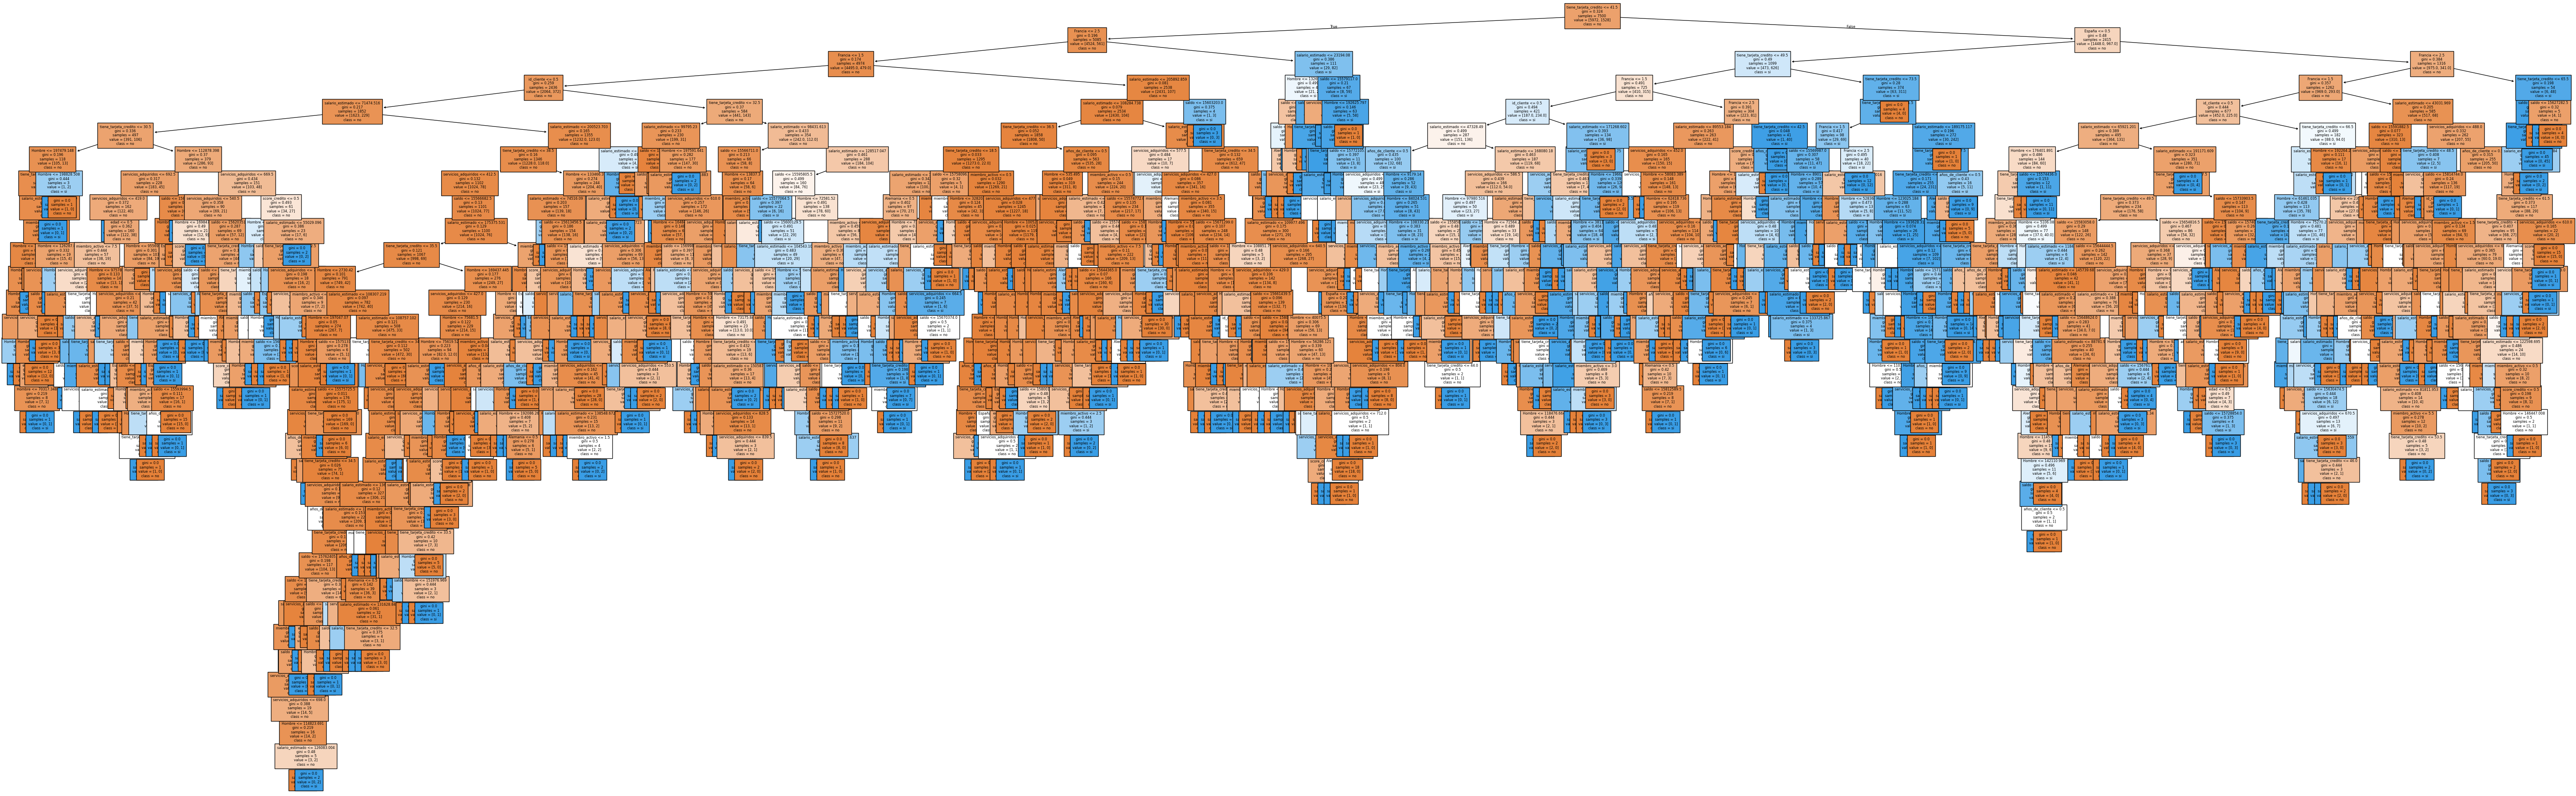

In [51]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,
          filled=True,
          feature_names=valores_columnas,
          class_names=['no','si'],
          fontsize=6,
          );

In [52]:
#modelo de arbol porcentaje de un 100% sin delimitaciones de profundidad por que eran pocos parametros
#quedo sobreajustado y no generalizo
modelo_arbol.score(x_train,y_train)

1.0

In [57]:
#se ajusta la profundidad a tres
modelo_arbol = DecisionTreeClassifier(max_depth=4, random_state=5)
modelo_arbol.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [58]:
modelo_arbol.score(x_test,y_test)

0.8464

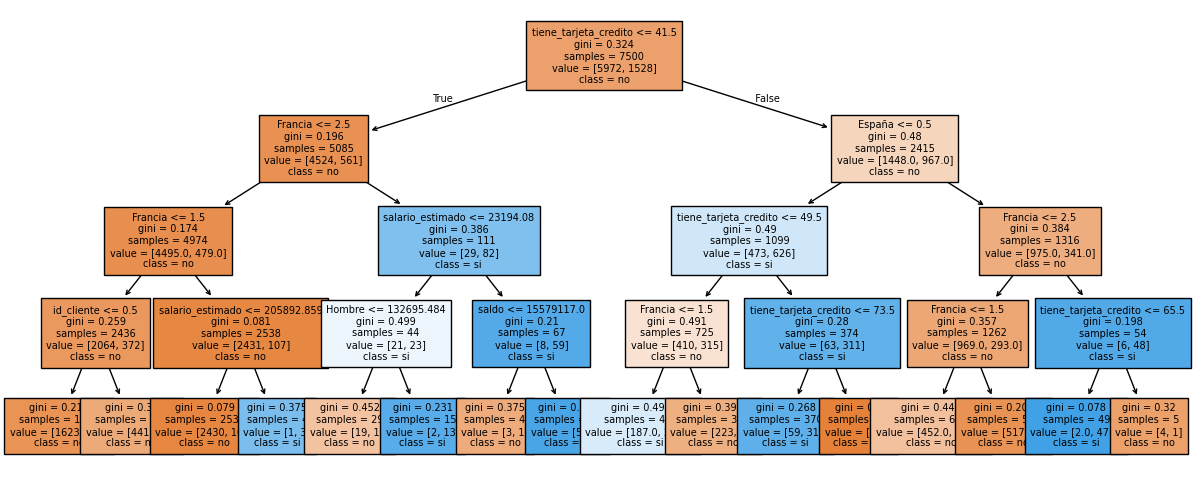

In [59]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol,
          filled=True,
          feature_names=valores_columnas,
          class_names=['no','si'],
          fontsize=7,
          );

In [60]:
modelo_arbol.score(x_train,y_train)

0.8509333333333333

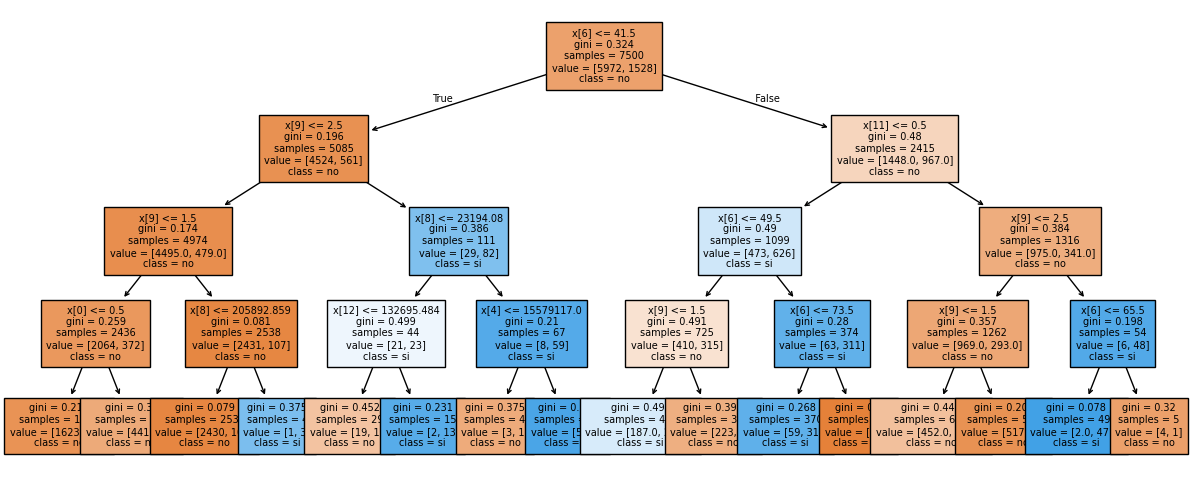

In [62]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol,
          filled=True,
          class_names=['no','si'],
          fontsize=7,
          );

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
normalizacion = MinMaxScaler()
x_train_normalizado = normalizacion.fit_transform(x_train)

In [65]:
pd.DataFrame(x_train_normalizado)

0    1    2    3         4      5         6    7         8         9   \
0     0.0  0.0  1.0  1.0  0.134945  0.796  0.216216  0.8  0.000000  0.333333   
1     0.0  0.0  1.0  0.0  0.388805  0.612  0.256757  0.2  0.000000  0.333333   
2     1.0  0.0  0.0  1.0  0.372064  0.634  0.256757  0.5  0.386645  0.666667   
3     0.0  0.0  1.0  1.0  0.540667  0.514  0.040541  0.0  0.000000  0.333333   
4     0.0  1.0  0.0  1.0  0.980751  0.374  0.270270  0.6  0.594774  0.000000   
...   ...  ...  ...  ...       ...    ...       ...  ...       ...       ...   
7495  1.0  0.0  0.0  0.0  0.440380  0.590  0.391892  0.9  0.637940  0.000000   
7496  0.0  1.0  0.0  1.0  0.670263  0.676  0.229730  0.6  0.000000  0.000000   
7497  0.0  1.0  0.0  1.0  0.480427  0.646  0.229730  0.6  0.000000  0.333333   
7498  0.0  0.0  1.0  1.0  0.261445  0.720  0.202703  0.2  0.000000  0.333333   
7499  0.0  0.0  1.0  0.0  0.415627  0.680  0.202703  0.5  0.000000  0.333333   

       10   11        12  
0     1.0  0.0  0.267600  
1     0.0  1.0  0.338919  
2     1.0  0.0  0.890516  
3     1.0  0.0  0.580365  
4     0.0  1.0  0.738898  
...   ...  ...       ...  
7495  1.0  0.0  0.609048  
7496  1.0  0.0  0.127054  
7497  1.0  0.0  0.492884  
7498  1.0  0.0  0.364454  
7499  1.0  0.0  0.689975  

[7500 rows x 13 columns]

## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
Knn = KNeighborsClassifier()

In [68]:
Knn.fit(x_train_normalizado,y_train)

KNeighborsClassifier()

In [71]:
x_test_normalizado = normalizacion.transform(x_test)

In [72]:
Knn.score(x_test_normalizado,y_test)

0.8016

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [70]:
x_test_normalizado = normalizacion.transform(x_test)

lista = [("dummy",dummy,x_test),("de Arbol",modelo_arbol,x_test),("de KNN",Knn,x_test_normalizado)]
for i in lista:
    print(f'la exactitud del modelo{i[0]}:{i[1].score(i[2],y_test)}')

la exactitud del modelodummy:0.7964
la exactitud del modelode Arbol:0.8464
la exactitud del modelode KNN:0.8016


In [77]:
import pickle

In [78]:
with open('modelo_onehotencoder.pickle','wb') as archivo:
  pickle.dump(one_hot,archivo)

In [79]:
with open('modelo_champion.pickle','wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

#**Ensayar con nuevos datos**

In [86]:
nuevo_dato = pd.DataFrame({
    'id_cliente': [0], # Added id_cliente
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1], # Corrected column name and added value
    'salario_estimado': [85270.00]
})

In [74]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

score_credito     pais sexo_biologico  edad  años_de_cliente  saldo  \
0            850  Francia         Hombre    27                3  56000   

   servicios_adquiridos  tiene_tarjeta_credito  miembro _activo  \
0                     1                      1                1   

   salario_estimado  
0           85270.0

In [80]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotencoder.pickle')
modelo_arbol = pd.read_pickle('/content/modelo_champion.pickle')

In [87]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato)

array([0])

#**Para saber más: ¿qué es Machine Learning?**

El Inteligencia Artificial (IA) se ha destacado como una de las áreas de mayor crecimiento y visibilidad en los últimos años. Es un campo de estudio amplio que abarca diversas áreas del conocimiento, tanto prácticas como teóricas, incluyendo la ciencia de la computación, la ciencia cognitiva, la filosofía de la mente y el Machine Learning (Aprendizaje Automático).

El Machine Learning (ML), como una subárea de la inteligencia artificial, se concentra en el desarrollo de algoritmos que son utilizados en la computadora para realizar tareas sin la necesidad de programar explícitamente las reglas que se utilizarán. Estos algoritmos basan sus decisiones a partir de datos con el objetivo de comprender e identificar el patrón existente en esos datos, para luego utilizar ese conocimiento en la realización de predicciones.

Cómo funciona el Machine Learning
El funcionamiento del Machine Learning tiene 3 etapas principales:

1 - Recolección de datos

La primera etapa de un proyecto de ML es la extracción o recolección de datos. Los datos son esenciales y pueden considerarse la materia prima de los algoritmos. La cantidad y calidad de estos datos tienen un impacto muy grande en el aprendizaje de los modelos. Con pocos datos, el modelo puede no tener información suficiente para aprender. Con datos de poca calidad, el modelo puede no ser capaz de diferenciar bien el patrón de los datos o comprender el patrón de manera diferente a lo que ocurre con los datos del mundo real.

2 - Entrenamiento de los modelos

Después de recolectar datos y asegurar que tienen calidad, se llega a la etapa de entrenar los modelos. El entrenamiento consiste en que el algoritmo busque el patrón presente en los datos y construya una regla para tomar decisiones posteriormente en nuevos datos.

3 - Evaluación

Con el modelo entrenado, se llega a la etapa de evaluar el desempeño del modelo, para identificar si realmente aprendió el patrón de los datos y si es capaz de aplicar de forma satisfactoria la regla generada por el algoritmo en datos nuevos, que no fueron utilizados durante el momento del entrenamiento.

A pesar de ser las etapas principales, estas no son las únicas tareas presentes en proyectos de Machine Learning. Cada proyecto tiene sus propias características, ya sea por el formato y naturaleza de los datos, el tipo de aplicación o los desafíos encontrados a lo largo del proceso.

#**Para saber más: ¿qué es clasificación?**

Dentro del área de Machine Learning, existen diferentes tipos de aprendizaje: el supervisado, semi supervisado, no supervisado y por refuerzo. La tarea de clasificación es solo una entre las tareas realizadas por los algoritmos, que forma parte del aprendizaje supervisado. Con el organigrama a continuación, observa los flujos que se establecen en estas relaciones.

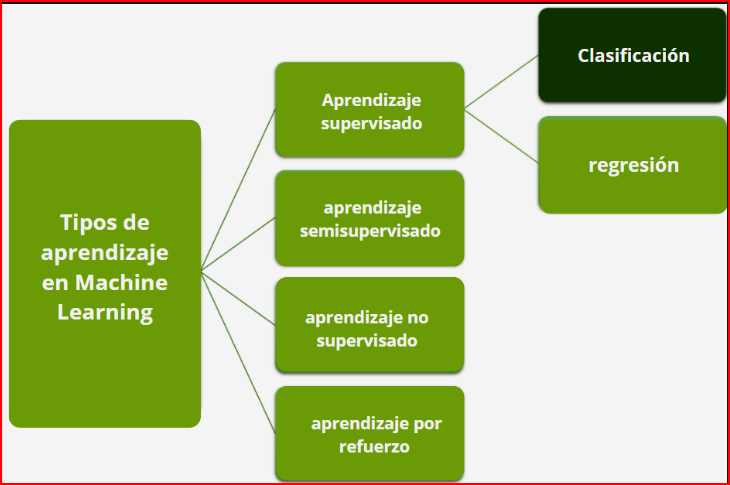

Imagina un grupo de jóvenes que está aprendiendo a identificar diferentes estilos musicales. Tienen un mentor que posee una colección de canciones en su dispositivo de audio, cada una debidamente etiquetada con el género musical correspondiente, pero los jóvenes no pueden distinguir los géneros musicales por sí mismos. Al principio, el mentor comienza a reproducir varias canciones y, al mismo tiempo, dice cuál es el género de cada una de ellas. Ellos escuchan con atención y, a lo largo del tiempo, comienzan a asociar las características musicales, como el ritmo, la instrumentación y los vocales, a los diferentes géneros.

En este ejemplo, los jóvenes se basan en algunas características como ritmos rápidos y vocales enérgicos que encajan en el género pop, mientras que las canciones con guitarras distorsionadas y vocales más intensos se dirigen al género rock. Con base en este proceso, los jóvenes logran identificar el género de nuevas canciones que no fueron previamente etiquetadas por el mentor, pero usando las reglas que aprendieron, fueron capaces de etiquetar y nombrar los nuevos elementos.

El aprendizaje supervisado en Machine Learning sigue este mismo razonamiento. Utiliza conjuntos de datos etiquetados, es decir, bases de datos con registros históricos que contienen la respuesta correcta en cada uno de los registros. Para entonces, a partir de esta respuesta y de las características de los datos, el algoritmo puede trazar una regla para llegar a la respuesta que podrá ser utilizada posteriormente en nuevos datos, con el fin de hacer una predicción.

La característica principal de la clasificación se da por el tipo de dato presente en la respuesta, que debe ser del tipo categórica. Un dato del tipo categórico es aquel que tiene diferentes clases o categorías. Como ejemplos de aplicaciones de clasificación con Machine Learning, tenemos:

Filtrado de correos electrónicos spam  
Diagnósticos médicos  
Análisis textual de sentimientos  
Detección de fraudes bancarios  

#**Para saber más: tipos de variables**

En una base de datos utilizada en proyectos de Machine Learning, podemos llamar a las columnas variables. Este concepto, proveniente de la estadística, representa una característica de interés que se mide en cada elemento de una muestra o población. El nombre indica que el valor varía de elemento a elemento, pudiendo tener valores numéricos o no numéricos.  

Las variables se dividen de la siguiente forma:  

**Variables cuantitativas o numéricas**  
Son características que pueden ser medidas a partir de valores numéricos que tienen sentido y se dividen entre variables discretas y continuas.  

**Variables discretas:** características medidas solo por un número finito o contable de valores. Solo tiene sentido para valores enteros. Por ejemplo: número de hijos, número de ventas.   
**Variables continuas:** características medidas que asumen valores en una escala continua (en la recta real), en la que tienen sentido valores fraccionarios. Ejemplo: peso, tiempo, altura.  
**Variables cualitativas o categóricas**  
Son características que no poseen valores cuantitativos y se definen por varias categorías o clases. Se dividen en nominales y ordinales.

**Variables nominales:** no existe ordenación entre las categorías. Ejemplo: sexo biológico, país, churn.  
**Variables ordinales:** existe una ordenación entre las categorías. Ejemplo: escolaridad, mes.  
Atención: Un punto importante a tratar es que no siempre una variable representada por números es cuantitativa.  

Por eso, es esencial tener una postura crítica y evaluar la información detrás del dato, y no solo fijarse en la forma en que está disponible. Por ejemplo, una información de ID de registro puede ser un número, sin embargo, su función está en categorizar un elemento. De la misma forma, una información de escolaridad puede estar representada con los valores 1, 2 y 3, y aun así no los transforma en una variable numérica. Esta información no puede ser utilizada para hacer sumas y calcular promedios, por ejemplo.